# Distribution Analysis

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import numpy as np

In [16]:
data = pd.read_csv('/Users/datasets/employees_attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


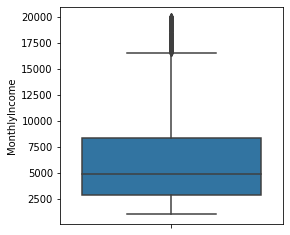

In [17]:
plt.figure(figsize=(4,4))
sns.boxplot(data=data, y='MonthlyIncome')

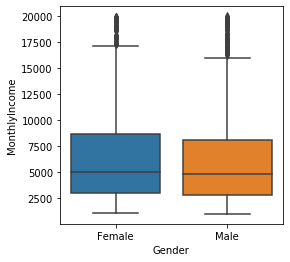

In [18]:
plt.figure(figsize=(4,4))
sns.boxplot(data=data, x='Gender', y='MonthlyIncome')

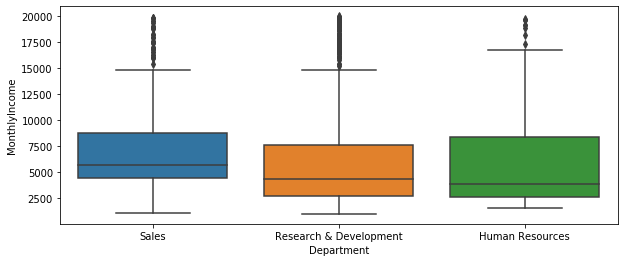

In [20]:
plt.figure(figsize=(10,4))
sns.boxplot(data=data, x='Department', y='MonthlyIncome')

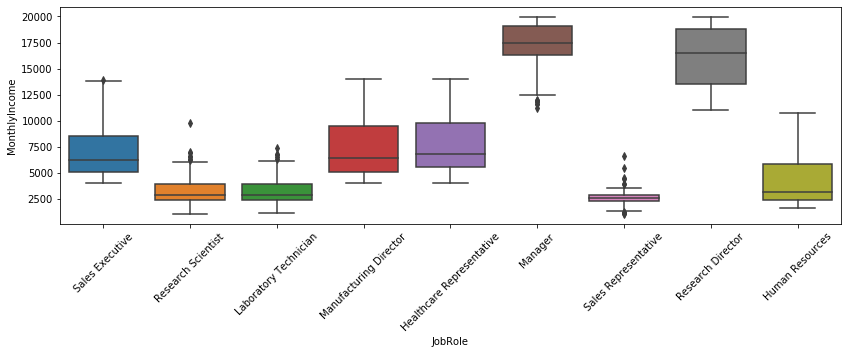

In [21]:
plt.figure(figsize=(14,4))
sns.boxplot(data=data, x='JobRole', y='MonthlyIncome')
plt.xticks(rotation=45)
plt.show()

In [22]:
sales_rep = data[data['JobRole'] == 'Sales Representative']
q1 = sales_rep['MonthlyIncome'].quantile(0.25)
q3 = sales_rep['MonthlyIncome'].quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5 * iqr
uw = q3 + 1.5 * iqr
lw, uw

(1307.25, 3821.25)

In [23]:
sales_outliers = sales_rep[(sales_rep['MonthlyIncome'] < lw) | 
                           (sales_rep['MonthlyIncome'] > uw)]
sales_outliers.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
238,32,0,Travel_Rarely,1401,Sales,4,2,Life Sciences,1,330,...,1,80,1,6,5,3,4,3,1,2
301,18,0,Travel_Rarely,812,Sales,10,3,Medical,1,411,...,1,80,0,0,2,3,0,0,0,0
539,50,0,Travel_Rarely,316,Sales,8,4,Marketing,1,738,...,4,80,1,4,2,3,2,2,2,2
564,45,0,Travel_Rarely,954,Sales,2,2,Technical Degree,1,783,...,1,80,0,9,3,3,8,7,3,1
764,28,0,Travel_Rarely,1144,Sales,10,1,Medical,1,1056,...,2,80,0,1,5,3,1,0,0,0


In [24]:
sales_outliers.index.tolist()

[238, 301, 539, 564, 764, 911, 1021, 1220, 1308, 1338, 1365]

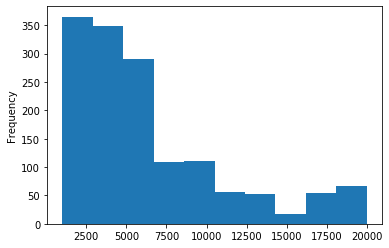

In [25]:
data.MonthlyIncome.plot.hist()

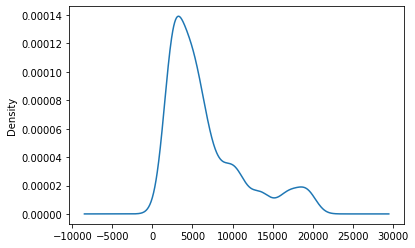

In [26]:
data.MonthlyIncome.plot.kde()

In [28]:
data.MonthlyIncome.skew()

1.3698166808390662

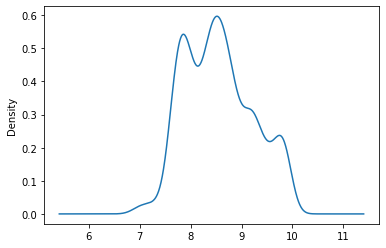

In [29]:
np.log(data.MonthlyIncome).plot.kde()

In [30]:
np.log(data.MonthlyIncome).skew()

0.2861922926389174